In [2]:
import utility
import ApexPhaze
import os 

current_directory= os.getcwd()
current_directory = r"{}".format(current_directory)

#cnfg= ApexPhaZe.ConfigReader()
#cnfg.load_config(current_directory+ '\\LensConfiguration.json')

Using default configuration file path.


C:\Program Files\Lumerical\v242\api\python\lumapi.py:895: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [3]:
pd= ApexPhaze.PhaseDesign()
radius_zemax, phase_zemax= pd.load_optimized_phase(file_path=current_directory+ '\\optimized_phase_d20_fl100.txt')
pd.compare_optimized_ideal()

NameError: name 'ApexPhaZe' is not defined

  0%|          | 0/11 [00:00<?, ?it/s]

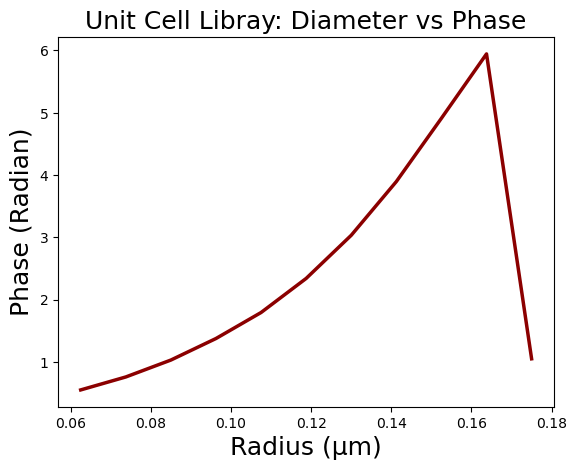

In [3]:
uc= ApexPhaze.UnitCellDesign()
radius_unitcell,phase_unitcell,_= uc.create_unit_cell_library(show_plot=True)
#print(phase_unitcell)

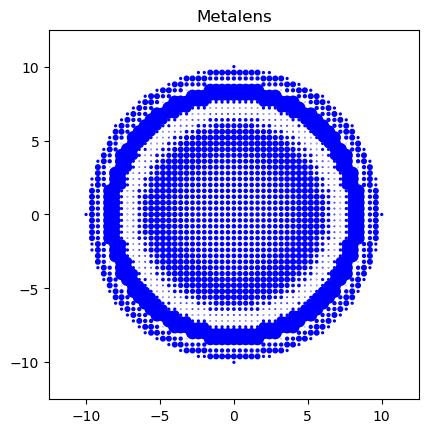

In [4]:
ld= ApexPhaze.LensDesign()
x,y,radius= ld.make_lens_geometry(radius_zemax, phase_zemax, radius_unitcell, phase_unitcell, show_lens= True)

In [5]:
fulllens= ApexPhaze.FullLensSim()
fulllens.run_fdtd(x,y,radius)

normalized power through surface near the metalens (using direct transmission): 0.5625759643578957
normalized power through surface near the metalens (by using Poynting vector): 0.5625714256458181
Focal Length: 46.15151515151514 μm, 
FWHM: 3.962566876254819 μm, 
Overall Efficiency:0.4885980373546012, 
Focusing Efficiency: 0.8685084508046295, 
Transmission Efficiency: 0.5625759643578957
